In [1]:
# All the imports
import numpy as np
import skimage as ski
print(np.__file__)
print(np.__version__)
print(ski.__version__)
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf
from skimage.transform import resize
from graphviz import Graph, render
from utils.netviz import NetViz
from utils.mnistutil import MNISTUitl
#(A, Ay), (B, By) = mnist.load_data()
#x = A[1]
#print(x.shape)
#xr = resize(x, (7, 7))
#print(xr.shape)
#plt.imshow(xr)
#plt.show()
#plt.imshow(x)
#plt.show()
sx = 7
sy = 7

/Users/mislam/anaconda/lib/python3.6/site-packages/numpy/__init__.py
1.16.2
0.14.2


/Users/mislam/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from utils.netviz import NetViz
mn = MNISTUitl()
viz = NetViz()

In [3]:
X, Y, x, y = mn.getdata2(0,0,sx,sy)
X.shape

/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(60000, 7, 7)

In [4]:
print(X.shape,Y.shape, x.shape,y.shape)

(60000, 7, 7) (60000,) (10000, 7, 7) (10000,)


In [5]:
nm , xt, yt = mn.train2(X, Y, x,y,sx,sy,10,50)

x_train shape: (60000, 7, 7, 1)
(60000, 7, 7, 1) 60000 train samples (60000,)
10000 test samples
(60000,) (60000,)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 49)                0         
_________________________________________________________________
H (Dense)                    (None, 49)                2450      
_________________________________________________________________
output (Dense)               (None, 10)                500       
Total params: 2,950
Trainable params: 2,950
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 1s 23us/step - loss: 2.2528 - acc: 0.2022

In [54]:
nm.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


In [6]:
print(xt.shape)
print(yt)

(10000, 7, 7, 1)
[7 2 1 ... 4 5 6]


[0]
(10000, 7, 7)
(49, 49)
0.0035909265 0.65915304 0.9643694
(49,)  Here
0.09077236 -0.07504117 MINMAX W
X1 [0.0953746  0.         0.20643461 0.         0.06974798 0.23846447
 0.         0.         0.         0.         0.         0.01425615
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.24437462 0.
 0.08639689 0.         0.02563962 0.         0.6374109  0.1959587
 0.         0.         0.         0.         0.25763398 0.
 0.01632814 0.23635365 0.         0.         0.         0.
 0.         0.         0.65915304 0.41575563 0.46039176 0.
 0.        ]
X2 [9.6436942e-01 1.4141484e-08 9.6609211e-03 1.0516495e-03 5.8891254e-07
 2.0597359e-02 3.6274089e-04 2.8790389e-06 3.9539593e-03 5.0523676e-07]
3.1967592 -10.231174 MINMAX W
{'n1', 'p4', 'n4', 'n5', 'p0', 'n0', 'n3', 'p1', 'n2', 'p2'} {'n1', 'n5', 'n4', 'n0', 'n3', 'n2'}
[[9.6436942e-01 1.4141512e-08 9.6609257e-03 1.0516505e-03 5.8891317e-07
  2.0597363e-02 3.6274089e-04 2.879036

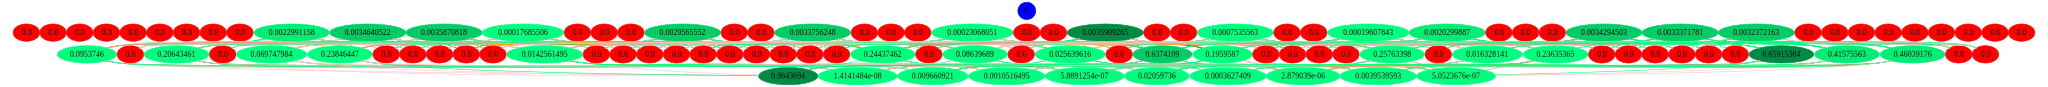

In [7]:
s = 10
e = 11
x1 = xt[ s:e]
y1 = yt[ s:e]
print(y1)
print(x.shape)
print(viz)
#dot, A, g = viz.vispredict(nm,x1,y1,7,7)
#print(nm.predict(x1),y1)
#dot
dot8, A = viz.vispredictwithlabel(nm,x1,y1,sx,sy)
print(nm.predict(x1),y1)
dot8

In [8]:
dot8.render('img/attack/testwithlabelzero.gv')

'img/attack/testwithlabelzero.gv.png'

In [25]:
s = 10
e = 11
x1 = xt[ s:e]
y1 = yt[ s:e]
print(y1)
print(x.shape)
print(viz)
dot, A, g = viz.vispredict(nm,x1,y1,sx,sy,ss = .001)
print(nm.predict(x1),y1)
dot

[0]
(10000, 28, 28)
(784, 49)
0.003921569 0.76146084 0.99732083
(49,)  Here
0.028046366 -0.030630292 MINMAX W
2.099777 -3.4837186 MINMAX W
{'n1', 'p4', 'n4', 'n5', 'p0', 'n0', 'n3', 'p1', 'p3', 'n2', 'p2'} {'n1', 'n4', 'n5', 'n0', 'n3', 'n2'}
[[9.9732095e-01 3.6209252e-10 9.4697915e-04 3.5720048e-05 1.6092187e-08
  1.3353082e-03 4.5660501e-05 6.0870184e-07 3.0615350e-04 8.6208629e-06]] [0]


In [26]:
dot.render('img/attack/evaluate/zero.gv')

'img/attack/evaluate/zero.gv.png'

FFGSM Attack Example.ipynb  one_new_adv6.jpg
FGSM.py                     one_new_adv7.jpg
Jan-13-2018.hdf5            one_new_adv8.jpg
eight_new0.jpg              one_new_adv9.jpg
eight_new1.jpg              seven_new0.jpg
eight_new10.jpg             seven_new1.jpg
eight_new11.jpg             seven_new12.jpg
eight_new12.jpg             seven_new13.jpg
eight_new15.jpg             seven_new14.jpg
eight_new16.jpg             seven_new15.jpg
eight_new17.jpg             seven_new16.jpg
eight_new19.jpg             seven_new17.jpg
eight_new2.jpg              seven_new18.jpg
eight_new3.jpg              seven_new19.jpg
eight_new4.jpg              seven_new3.jpg
eight_new5.jpg              seven_new4.jpg
eight_new6.jpg              seven_new5.jpg
eight_new7.jpg              seven_new6.jpg
eight_new8.jpg              seven_new7.jpg
eight_new9.jpg              seven_new8.jpg
eight_new_adv0.jpg          seven_new9.jpg
eight_new_adv1.jpg          seven_new_adv0.jpg
eight_new_adv10.jpg         seven_

/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


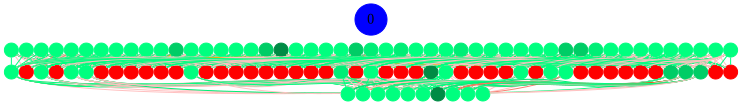

In [18]:
% ls attacks/FGSM
ad_zero10 = plt.imread("attacks/FGSM/zero_new_adv15.jpg")
xo = resize(ad_zero10, (7, 7))


y0 = [0]
print(y1)
xo = xo.reshape(1,7,7,1)
xo = xo/255
doto, A, g = viz.vispredict(nm,xo,y0,7,7)
print(nm.predict(xo),0)
doto

In [13]:
doto.render('img/attack/adversarialzeropredictedas7.gv')

'img/attack/adversarialzeropredictedas7.gv.png'

In [13]:
# Generate dynamic networks for digit 0 (both original and adversarial)
% ls attacks/FGSM/FGSM/zero/adv

zero_new_adv10.jpg  zero_new_adv14.jpg  zero_new_adv2.jpg   zero_new_adv9.jpg
zero_new_adv11.jpg  zero_new_adv15.jpg  zero_new_adv6.jpg
zero_new_adv12.jpg  zero_new_adv16.jpg  zero_new_adv7.jpg
zero_new_adv13.jpg  zero_new_adv17.jpg  zero_new_adv8.jpg


In [51]:
import os
path = "attacks/localsearch/zero/adv"
advzero = os.listdir(path)
advzero = [os.path.join(path,x) for x in advzero]
i = 0
for f in advzero:
    im = plt.imread(f)
    xo = resize(im, (7, 7))
    xo = xo.reshape(1,7,7,1)
    xo = xo/255
    doto, A, g = viz.vispredict(nm,xo,[0],7,7)
    doto.render('img/attack/evaluate/localsearch/zero/adv_zero_{0}.gv'.format(i))
    i = i + 1

/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.0035640138408304443 0.8361262392085678 0.5523050136118576
(49,)  Here
0.056943459428305206 -0.05437241663157299 MINMAX W
2.8779273045849445 -9.09571954126017 MINMAX W
{'p3', 'n4', 'n5', 'p2', 'n2', 'p0', 'n0', 'p1', 'n1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.0038023836985774705 0.7396409331789753 0.5014069966095518
(49,)  Here
0.06553999362932345 -0.04657260418488218 MINMAX W
2.545827098069917 -8.046113342645324 MINMAX W
{'n4', 'p3', 'n5', 'p2', 'n2', 'p0', 'n0', 'p1', 'n1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.0034678969627066464 0.8865352882769696 0.5102801098251913
(49,)  Here
0.07932748477764201 -0.06897879015707309 MINMAX W
3.0514340932840227 -9.644089573400057 MINMAX W
{'p3', 'n4', 'n5', 'p2', 'p0', 'n2', 'n0', 'n1', 'p1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.0038062283737024215 0.6664459123147629 0.48622881793528017
(49,)  Here
0.07079955506168939 -0.053827048033670666 MINMAX W
2.7577779047051862 -7.249868289712006 MINMAX W
{'p3', 'n4', 'n5', 'p2', 'p0', 'n2', 'n0', 'p1', 'n3', 'n1', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.003737024221453287 0.696424564930257 0.8653053932454841
(49,)  Here
0.07551309605370755 -0.05615407633533939 MINMAX W
2.7833853416256056 -7.5759882027451155 MINMAX W
{'p3', 'n4', 'n5', 'p0', 'p2', 'n2', 'n0', 'p1', 'n1', 'p4', 'n3'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.003571703191080354 0.7196889482049563 0.5547630876740597
(49,)  Here
0.07889758619332655 -0.05558246559750239 MINMAX W
2.477152824204587 -7.829067577179465 MINMAX W
{'p3', 'n4', 'n5', 'p2', 'n2', 'p0', 'n0', 'p1', 'n1', 'p4', 'n3'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


In [52]:
import os
path = "attacks/localsearch/zero/original"
advzero = os.listdir(path)
advzero = [os.path.join(path,x) for x in advzero]
i = 0
for f in advzero:
    im = plt.imread(f)
    xo = resize(im, (7, 7))
    xo = xo.reshape(1,7,7,1)
    xo = xo/255
    doto, A, g = viz.vispredict(nm,xo,[0],7,7)
    doto.render('img/attack/evaluate/localsearch/zero/or_zero_{0}.gv'.format(i))
    i = i + 1

/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.0035793925413302513 0.8200711239740873 0.5159980838455327
(49,)  Here
0.09029480314859739 -0.061558941551833245 MINMAX W
2.8226659668289322 -8.92106550156196 MINMAX W
{'n4', 'p3', 'n5', 'p2', 'n2', 'p0', 'n0', 'p1', 'n1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.003848519800076894 0.6930264650070403 0.8659023790510083
(49,)  Here
0.09578570334006621 -0.06530239070025558 MINMAX W
2.7250962777682193 -7.539022296850317 MINMAX W
{'n4', 'p3', 'n5', 'p0', 'n2', 'p2', 'n0', 'p1', 'n1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.003748558246828144 0.8489110241125111 0.4593109686656641
(49,)  Here
0.07942652033916221 -0.06637870272321451 MINMAX W
2.9219322404821013 -9.234797604390536 MINMAX W
{'n4', 'p3', 'n5', 'p2', 'p0', 'n2', 'n0', 'n1', 'p1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.003771626297577855 0.6699980975682346 0.8263832036700857
(49,)  Here
0.07079955506168939 -0.07810207045752016 MINMAX W
2.576914184831536 -7.288510398174911 MINMAX W
{'p3', 'n5', 'p2', 'p0', 'n2', 'n0', 'p1', 'n1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.0038292964244521334 0.7214590746052034 0.9782163517640405
(49,)  Here
0.07640185073447749 -0.07050203563157799 MINMAX W
3.31681321825612 -7.848323728385135 MINMAX W
{'p3', 'n4', 'n5', 'p0', 'n2', 'p2', 'n0', 'p1', 'n1', 'p4', 'n3'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.003571703191080357 0.6695890762213788 0.3221760011743988
(49,)  Here
0.06730453406879881 -0.049647797053248045 MINMAX W
2.441805367885605 -7.284060898466697 MINMAX W
{'p3', 'n4', 'n5', 'p0', 'n2', 'p2', 'n0', 'p1', 'n1', 'p4', 'n3'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


In [53]:
import os
path = "attacks/localsearch/zero/diff"
advzero = os.listdir(path)
advzero = [os.path.join(path,x) for x in advzero]
i = 0
for f in advzero:
    im = plt.imread(f)
    xo = resize(im, (7, 7))
    xo = xo.reshape(1,7,7,1)
    xo = xo/255
    doto, A, g = viz.vispredict(nm,xo,[0],7,7)
    doto.render('img/attack/evaluate/localsearch/zero/diff_zero_{0}.gv'.format(i))
    i = i + 1

/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.00241830065359477 0.7570696650753109 0.47943125566482003
(49,)  Here
0.07718253974958549 -0.06618916729696435 MINMAX W
4.346133505889059 -8.575785368384716 MINMAX W
{'p3', 'n4', 'n5', 'p2', 'n2', 'p0', 'n0', 'p1', 'n1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.002652825836216842 0.7812943909059163 0.6878438573874229
(49,)  Here
0.08419913427227507 -0.07004605486502055 MINMAX W
4.806384872465792 -9.483952807309352 MINMAX W
{'n4', 'p3', 'n5', 'p2', 'n2', 'p0', 'n0', 'p1', 'n3', 'n1', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.0029142637447135684 0.7694476277921714 0.5610409827301059
(49,)  Here
0.08215262753649064 -0.06867748185700061 MINMAX W
4.647638962703146 -9.170715570489834 MINMAX W
{'p3', 'n4', 'n5', 'p2', 'n2', 'p0', 'n0', 'p1', 'n1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.0023836985774702067 0.7470183818544713 0.7599620571417365
(49,)  Here
0.07659782353936136 -0.06519384147294985 MINMAX W
4.509570942590336 -8.898279920475655 MINMAX W
{'n4', 'p3', 'n5', 'p2', 'n2', 'p0', 'n0', 'p1', 'n1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.0035870818915801615 0.73529818153803 0.513438290371025
(49,)  Here
0.07659782353936136 -0.06320318982492085 MINMAX W
4.385645128010394 -8.653749653285342 MINMAX W
{'n4', 'p3', 'n5', 'p2', 'n2', 'p0', 'n0', 'p1', 'n1', 'n3', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}


/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/mislam/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(49, 49)
0.002875816993464061 0.7790654357975605 0.6133634191446579
(49,)  Here
0.07630546543424932 -0.06544267292895349 MINMAX W
4.6155699567010515 -9.107437046698802 MINMAX W
{'n4', 'p3', 'n5', 'p2', 'n2', 'p0', 'n0', 'p1', 'n3', 'n1', 'p4'} {'n4', 'n5', 'n2', 'n0', 'n1', 'n3'}
